In [1]:
import pandas as pd             
import numpy as np

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('./data/train.csv')

In [3]:
train_data.shape

(523021, 36)

In [4]:
train_data.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [5]:
train_data.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


In [6]:
train_data.describe(exclude=[np.number])

,Date,StoreType,AssortmentType,Events
count,523021,523021,523021,398923
unique,729,4,3,21
top,30/06/2017,Hyper Market,General,Rain
freq,749,292769,296188,204733


In [7]:
categorical_variables_mask = train_data.dtypes==object
categorical_variables = train_data.columns[categorical_variables_mask].tolist()
print(categorical_variables)
numerical_variables = train_data.columns[~categorical_variables_mask].tolist()
numerical_variables.remove('NumberOfSales')

['Date', 'StoreType', 'AssortmentType', 'Events']


In [8]:
numerical_variables

['StoreID',
 'IsHoliday',
 'IsOpen',
 'HasPromotions',
 'NearestCompetitor',
 'Region',
 'NumberOfCustomers',
 'Region_AreaKM2',
 'Region_GDP',
 'Region_PopulationK',
 'CloudCover',
 'Max_Dew_PointC',
 'Max_Gust_SpeedKm_h',
 'Max_Humidity',
 'Max_Sea_Level_PressurehPa',
 'Max_TemperatureC',
 'Max_VisibilityKm',
 'Max_Wind_SpeedKm_h',
 'Mean_Dew_PointC',
 'Mean_Humidity',
 'Mean_Sea_Level_PressurehPa',
 'Mean_TemperatureC',
 'Mean_VisibilityKm',
 'Mean_Wind_SpeedKm_h',
 'Min_Dew_PointC',
 'Min_Humidity',
 'Min_Sea_Level_PressurehPa',
 'Min_TemperatureC',
 'Min_VisibilitykM',
 'Precipitationmm',
 'WindDirDegrees']

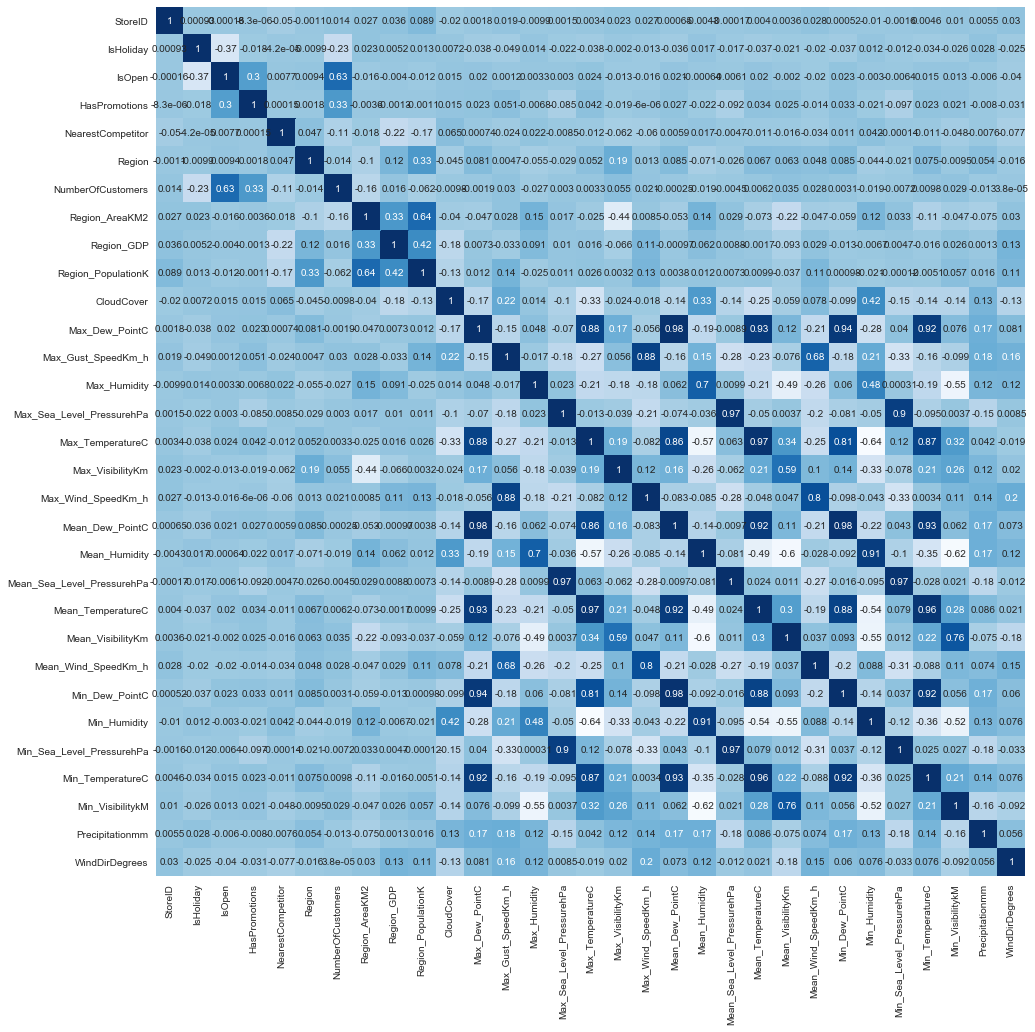

In [9]:
cov=train_data[numerical_variables].corr(method='pearson')
plt.figure(figsize = (16,16))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

# Variables that will need Imputation

In [10]:
#Isnull() checks for nans
#any() returns true if there is any true in an array
#values() then converts everything into a single array
areasWithNansMask = train_data.isnull().any().values

#This is how we access column titles
areasWithNans = train_data.columns.values

#using boolean indexing here
areasWithNans = areasWithNans[areasWithNansMask]
print("Variable that will need to be imputed", areasWithNans)

Variable that will need to be imputed ['CloudCover' 'Events' 'Max_Gust_SpeedKm_h' 'Max_VisibilityKm'
 'Mean_VisibilityKm' 'Min_VisibilitykM']


In [30]:
print("The variables and the count of null and not null \n")
#After using the isnull function, replace all instances of false to string "not null" and true instances to "Null"
#This makes it much more readable when using the value_counts function
cloudCoverPrintList = train_data['CloudCover'].isnull().replace(False, "Not Null").replace(True, "Null").value_counts()
print("CloudCover Null values:\n",cloudCoverPrintList, "\n")

eventsPrintList = train_data['Events'].isnull().replace(False, "Not Null").replace(True, "Null").value_counts()
print("Events Null values:\n",eventsPrintList, "\n")

maxGustPrintList = train_data['Max_Gust_SpeedKm_h'].isnull().replace(False, "Not Null").replace(True, "Null").value_counts()
print("Max_Gust_SpeedKm_h Null values:\n",maxGustPrintList, "\n")

maxVisPrintList=train_data['Max_VisibilityKm'].isnull().replace(False, "Not Null").replace(True, "Null").value_counts()
print("Max_VisibilityKm Null values:\n",maxVisPrintList , "\n")

meanVisPrintList=train_data['Mean_VisibilityKm'].isnull().replace(False, "Not Null").replace(True, "Null").value_counts()
print("Mean_VisibilityKm Null values:\n", meanVisPrintList, "\n")

minVisPrintList=train_data['Min_VisibilitykM'].isnull().replace(False, "Not Null").replace(True, "Null").value_counts()
print("Min_VisibilitykM Null values:\n",minVisPrintList , "\n")

The variables and the count of null and not null 

CloudCover Null values:
 Not Null    481840
Null         41181
Name: CloudCover, dtype: int64 

Events Null values:
 Not Null    398923
Null        124098
Name: Events, dtype: int64 

Max_Gust_SpeedKm_h Null values:
 Null        409947
Not Null    113074
Name: Max_Gust_SpeedKm_h, dtype: int64 

Max_VisibilityKm Null values:
 Not Null    511683
Null         11338
Name: Max_VisibilityKm, dtype: int64 

Mean_VisibilityKm Null values:
 Not Null    511683
Null         11338
Name: Mean_VisibilityKm, dtype: int64 

Min_VisibilitykM Null values:
 Not Null    511683
Null         11338
Name: Min_VisibilitykM, dtype: int64 



In [38]:
#"Seeing corellation between nan vis with nan cloudcoverage
print("Seeing corellation between nan vis with nan cloudcoverage")

mask =train_data['Min_VisibilitykM'].isna()
mask2 =train_data['Min_VisibilitykM'].isnull()
print(mask.value_counts(),"\n")
print(mask2.value_counts(),"\n")

storesWithNoMinVis = train_data[mask]

pd.options.display.max_rows = 15
pd.options.display.max_columns = 999

#print(storesWithNoMinVis.head())
#The store id followed by the number of times they have non visibility
print("The store id followed by the number of times they have non visibility")
print("HEre \n")
result = storesWithNoMinVis.groupby(['StoreID']).count()
print(result['Date'])

#This one is the store id followed by count of nan cloudcover
print("This one is the store id followed by count of nan cloudcover")
result2Mask = storesWithNoMinVis['CloudCover'].isnull()
result2 = storesWithNoMinVis[result2Mask]
result2 = result2.groupby(['StoreID']).count()
print(result2['Date'])
print("Result: No correlatioin")



Seeing corellation between nan vis with nan cloudcoverage
False    511683
True      11338
Name: Min_VisibilitykM, dtype: int64 

False    511683
True      11338
Name: Min_VisibilitykM, dtype: int64 

The store id followed by the number of times they have non visibility
HEre 

StoreID
1000    13
1001    12
1002     9
1003    13
1004    27
1005     5
1006    23
        ..
1742     5
1743    21
1744    12
1745     9
1746    25
1747     9
1748    13
Name: Date, Length: 749, dtype: int64
This one is the store id followed by count of nan cloudcover
StoreID
1000    13
1001    10
1002     7
1003    13
1004    27
1005     5
1006    22
        ..
1742     5
1743     5
1744    10
1745     7
1746    24
1747     7
1748    13
Name: Date, Length: 749, dtype: int64
Result: No correlatioin


In [40]:
#droping rows with nans after fixing the events column
print("droping rows with nans after fixing the events column")
Events = train_data['Events']
Events = Events.fillna("Clear")

#Dropping columns
#new = train_data.dropna(axis=1)

#Dropping just events
#print("The orginial data: \n", train_data.head())
print("The orginial data: \n")
print(train_data.shape)
droppingRows = train_data.drop(columns="Events")
#print("Without Events now: \n",new.head())
print("Without Events now: \n")
print(droppingRows.shape)

droppingRows = droppingRows.drop(columns="Max_Gust_SpeedKm_h")
#print("Without Max gust speed now: \n",new.head())
print("Without Max gust speed now: \n")
print(droppingRows.shape)

droppingRows = droppingRows.assign(Events = Events.values)
#print(new.describe())
#print("Events had been added back in: \n",new.head())
print("Events had been added back in: \n")
print(droppingRows.shape)
droppingRows = droppingRows.dropna()
print("After dropping nan values: \n")
print(droppingRows.shape)


droping rows with nans after fixing the events column
The orginial data: 

(523021, 36)
Without Events now: 

(523021, 35)
Without Max gust speed now: 

(523021, 34)
Events had been added back in: 

(523021, 35)
After dropping nan values: 

(480341, 35)


In [39]:
#droping all columns with nans after fixing the events column
print("droping all columns with nans after fixing the events column")
Events = train_data['Events']
Events = Events.fillna("Clear")

#Dropping columns
#new = train_data.dropna(axis=1)

#Dropping just events
#print("The orginial data: \n", train_data.head())
print("The orginial data: \n")
print(train_data.shape)

droppedColumns = train_data.dropna(axis=1)
print("After dropping nan columns: \n")
print(droppedColumns.shape)

droppedColumns = droppedColumns.assign(Events = Events.values)
#print(new.describe())
#print("Events had been added back in: \n",new.head())
print("Events had been added back in: \n")
print(droppedColumns.shape)

droping all columns with nans after fixing the events column
The orginial data: 

(523021, 36)
After dropping nan columns: 

(523021, 30)
Events had been added back in: 

(523021, 31)


# Variables Analysis

In [ ]:
#StoreType: 4 types
print(train_data['StoreType'].value_counts())
print("Null Values: ",train_data['StoreType'].isnull().any())
train_data['StoreType'].value_counts().plot.bar()

In [ ]:
#AssortmentType
print(train_data['AssortmentType'].value_counts())
print("Null Values: ",train_data['AssortmentType'].isnull().any())
train_data['AssortmentType'].value_counts().plot.bar()

In [ ]:
#StoreID
print(train_data['StoreID'].describe())
print(train_data['StoreID'].value_counts())
print("Null Values: ",train_data['StoreID'].isnull().any())
train_data['StoreID'].value_counts().plot.bar()

In [ ]:
#NearestCompetitor
print(train_data['NearestCompetitor'].value_counts().head())
print("Null Values: ",train_data['NearestCompetitor'].isnull().any())
hist1 = sns.distplot(train_data['NearestCompetitor'],bins=20)

In [ ]:
hist2 = sns.distplot(train_data[train_data['NearestCompetitor']<20000]['NearestCompetitor'],bins=20)

In [ ]:
#NumberOfCustomers
print(train_data['NumberOfCustomers'].value_counts().head())
print("Null Values: ",train_data['NumberOfCustomers'].isnull().any())
hist1 = sns.distplot(train_data['NumberOfCustomers'],bins=20)

In [ ]:
hist2 = sns.distplot(train_data[train_data['NumberOfCustomers']<1000]['NumberOfCustomers'],bins=20)

In [ ]:
#NumberOfSales: TARGET 
print(train_data['NumberOfSales'].value_counts().head())
print("Null Values: ",train_data['NumberOfSales'].isnull().any())
print("Number of stores:", len(set(train_data['NumberOfSales'])))
hist1 = sns.distplot(train_data['NumberOfSales'],bins=20)

In [ ]:
hist2 = sns.distplot(train_data[train_data['NumberOfSales']<15000]['NumberOfSales'],bins=20)

In [ ]:
#Region_AreaKM2
print(train_data['Region_AreaKM2'].value_counts().head())
print("Null Values: ",train_data['Region_AreaKM2'].isnull().any())
hist1 = sns.distplot(train_data['Region_AreaKM2'],bins=20)

In [ ]:
#Region: 10 regions
print(train_data['Region'].value_counts())

In [ ]:
#Region_GDP
print(train_data['Region_GDP'].value_counts().head())
print("Null Values: ",train_data['Region_GDP'].isnull().any())
hist1 = sns.distplot(train_data['Region_GDP'],bins=20)

In [ ]:
#Region_PopulationK
print(train_data['Region_PopulationK'].value_counts().head())
print("Null Values: ",train_data['Region_PopulationK'].isnull().any())
hist1 = sns.distplot(train_data['Region_PopulationK'],bins=20)

In [ ]:
#CloudCover 0-9
print(train_data['CloudCover'].value_counts())
print("Null Values: ",train_data['CloudCover'].isnull().any())
print(train_data['CloudCover'].isnull().value_counts())
#hist1 = sns.distplot(train_data['CloudCover'],bins=4)

In [ ]:
#Events
print(train_data['Events'].value_counts().head())
print("Null Values: ",train_data['Events'].isnull().any())
print(train_data['Events'].isnull().value_counts())
train_data['Events'].value_counts().plot.bar()

In [ ]:
#Max_Dew_PointC
print(train_data['Max_Dew_PointC'].value_counts().head())
print("Null Values: ",train_data['Max_Dew_PointC'].isnull().any())
hist1 = sns.distplot(train_data['Max_Dew_PointC'],bins=20)

In [ ]:
#Max_Gust_SpeedKm_h
print(train_data['Max_Gust_SpeedKm_h'].value_counts().head())
print("Null Values: ",train_data['Max_Gust_SpeedKm_h'].isnull().any())
print(train_data['Max_Gust_SpeedKm_h'].isnull().value_counts())
train_data['Max_Gust_SpeedKm_h'].value_counts().sort_index().plot.bar()

In [ ]:
#Max_Humidity
print(train_data['Max_Humidity'].value_counts().head())
print("Null Values: ",train_data['Max_Humidity'].isnull().any())
hist1 = sns.distplot(train_data['Max_Humidity'],bins=20)

In [ ]:
hist2 = sns.distplot(train_data[train_data['Max_Humidity']>50]['Max_Humidity'],bins=10)

In [ ]:
#Max_Sea_Level_PressurehPa
print(train_data['Max_Sea_Level_PressurehPa'].value_counts().head())
print("Null Values: ",train_data['Max_Sea_Level_PressurehPa'].isnull().any())
hist2 = sns.distplot(train_data['Max_Sea_Level_PressurehPa'],bins=10)

In [ ]:
#Max_TemperatureC
print(train_data['Max_TemperatureC'].value_counts().head())
print("Null Values: ",train_data['Max_TemperatureC'].isnull().any())
hist2 = sns.distplot(train_data['Max_TemperatureC'],bins=10)

In [ ]:
#Max_VisibilityKm
print(train_data['Max_VisibilityKm'].value_counts().head())
print("Null Values: ",train_data['Max_VisibilityKm'].isnull().any())
print(train_data['Max_VisibilityKm'].isnull().value_counts())
train_data['Max_VisibilityKm'].value_counts().sort_index().plot.bar()

In [ ]:
#Max_Wind_SpeedKm_h
print(train_data['Max_Wind_SpeedKm_h'].value_counts().head())
print("Null Values: ",train_data['Max_Wind_SpeedKm_h'].isnull().any())
hist2 = sns.distplot(train_data['Max_Wind_SpeedKm_h'],bins=10)

In [ ]:
hist2 = sns.distplot(train_data[train_data['Max_Wind_SpeedKm_h']<60]['Max_Wind_SpeedKm_h'],bins=10)

In [ ]:
#Mean_Dew_PointC
print(train_data['Mean_Dew_PointC'].value_counts().head())
print("Null Values: ",train_data['Mean_Dew_PointC'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Dew_PointC'],bins=10)

In [ ]:
#Mean_Humidity
print(train_data['Mean_Humidity'].value_counts().head())
print("Null Values: ",train_data['Mean_Humidity'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Humidity'],bins=10)

In [ ]:
#Mean_Sea_Level_PressurehPa
print(train_data['Mean_Sea_Level_PressurehPa'].value_counts().head())
print("Null Values: ",train_data['Mean_Sea_Level_PressurehPa'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Sea_Level_PressurehPa'],bins=10)

In [ ]:
#Mean_TemperatureC
print(train_data['Mean_TemperatureC'].value_counts().head())
print("Null Values: ",train_data['Mean_TemperatureC'].isnull().any())
hist2 = sns.distplot(train_data['Mean_TemperatureC'],bins=10)

In [ ]:
#Mean_VisibilityKm
print(train_data['Mean_VisibilityKm'].value_counts().head())
print("Null Values: ",train_data['Mean_VisibilityKm'].isnull().any())
print(train_data['Mean_VisibilityKm'].isnull().value_counts())
train_data['Mean_VisibilityKm'].value_counts().sort_index().plot.bar()

In [ ]:
#Mean_Wind_SpeedKm_h
print(train_data['Mean_Wind_SpeedKm_h'].value_counts().head())
print("Null Values: ",train_data['Mean_Wind_SpeedKm_h'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Wind_SpeedKm_h'],bins=10)

In [ ]:
hist2 = sns.distplot(train_data[train_data['Mean_Wind_SpeedKm_h']<40]['Mean_Wind_SpeedKm_h'],bins=10)

In [ ]:
#Min_Dew_PointC
print(train_data['Min_Dew_PointC'].value_counts().head())
print("Null Values: ",train_data['Min_Dew_PointC'].isnull().any())
hist2 = sns.distplot(train_data['Min_Dew_PointC'],bins=10)

In [ ]:
#Min_Humidity
print(train_data['Min_Humidity'].value_counts().head())
print("Null Values: ",train_data['Min_Humidity'].isnull().any())
hist2 = sns.distplot(train_data['Min_Humidity'],bins=10)

In [ ]:
#Min_Sea_Level_PressurehPa
print(train_data['Min_Sea_Level_PressurehPa'].value_counts().head())
print("Null Values: ",train_data['Min_Sea_Level_PressurehPa'].isnull().any())
hist2 = sns.distplot(train_data['Min_Sea_Level_PressurehPa'],bins=10)

In [ ]:
#Min_TemperatureC
print(train_data['Min_TemperatureC'].value_counts().head())
print("Null Values: ",train_data['Min_TemperatureC'].isnull().any())
hist2 = sns.distplot(train_data['Min_TemperatureC'],bins=10)

In [ ]:
#Min_VisibilitykM
print(train_data['Min_VisibilitykM'].value_counts().head())
print("Null Values: ",train_data['Min_VisibilitykM'].isnull().any())
print("Null count:", train_data['Min_VisibilitykM'].isnull().value_counts())
minVisMask = train_data['Min_VisibilitykM'].isnull().values
minVisList = train_data['Min_VisibilitykM']
print("Null count Jaimini version:", len(minVisList[minVisMask]))
train_data['Min_VisibilitykM'].value_counts().sort_index().plot.bar()

In [ ]:
#Precipitationmm
print(train_data['Precipitationmm'].value_counts().head())
print("Null Values: ",train_data['Precipitationmm'].isnull().any())
hist2 = sns.distplot(train_data['Precipitationmm'],bins=10)

In [ ]:
hist2 = sns.distplot(train_data[train_data['Precipitationmm']<10]['Precipitationmm'],bins=10)

In [ ]:
hist2 = sns.distplot(train_data[train_data['Precipitationmm']<3]['Precipitationmm'],bins=10)

In [ ]:
#WindDirDegrees
print(train_data['WindDirDegrees'].value_counts().head())
print("Null Values: ",train_data['WindDirDegrees'].isnull().any())
hist2 = sns.distplot(train_data['WindDirDegrees'],bins=10)